### 📦 Briefing do Projeto – Vendas XPTO

#### 🧩 Cenário
A empresa XPTO está em expansão e deseja modernizar suas decisões comerciais com base em dados.

O departamento de vendas forneceu dois arquivos para a equipe de dados:
- `base_vendas.csv`: com as vendas realizadas.
- `categoria_valores.csv`: com os percentuais de aumento dos produtos por categoria.

#### 🎯 Objetivos do Projeto
1. Aplicar os percentuais de acréscimo às vendas e criar uma nova coluna com o valor ajustado.
2. Realizar um comparativo por categoria (antes e depois do acréscimo).
3. Calcular a comissão de cada vendedor (2,5% sobre o total vendido).
4. Gerar gráficos para apoiar a análise (barras comparativas e comissão).
5. Organizar os dados e simular o envio dos resultados por e-mail.

#### 🔍 Situação Problema

A empresa XPTO forneceu dois arquivos CSV:

- `base_vendas.csv`: registros das vendas realizadas.
- `categoria_valores.csv`: percentuais de aumento por categoria de produto.

Sua missão:
1. Aplicar os percentuais de aumento aos dados de venda.
2. Calcular a comissão dos vendedores (2,5%).
3. Realizar análises agregadas por categoria e por vendedor.
4. Gerar gráficos comparativos.
5. Responder o Desafio.


#### 💡 O que se espera de você?
- Que organize os dados de forma clara e limpa;
- Aplique os cálculos e gere as visualizações corretamente;
- Responda aos desafios e complete os blocos de código propostos.


#### Esse projeto é um ótimo exemplo de como Python pode ser usado para automatizar análises comerciais reais. 😉
---

### Etapa 1: Instalação de bibliotecas

Execute o código abaixo para instalar a biblioteca `chardet` se necessário ou repita o processo para as demais bibliotecas.

In [1]:
!pip install chardet

### Etapa 2: Importação de bibliotecas

**Exercício:** Execute o código abaixo para importar as bibliotecas que serão usadas neste notebook.

In [1]:
import pandas as pd
import numpy as np
import chardet
import matplotlib.pyplot as plt
import seaborn as sns


### Etapa 3: Como descobrir encoding do arquivo CSV

🚨 **Exercício:** Use a biblioteca `chardet` para descobrir o encoding do arquivo `base_vendas.csv` e `categorias_valores.csv`.

In [2]:
rawdata = open('base_vendas.csv', 'rb').read()
encoding = chardet.detect(rawdata)['encoding']
print('Encoding detectado:', encoding)

Encoding detectado: ISO-8859-1


In [3]:
rawdata = open('categorias_valores.csv', 'rb').read()
encoding2 = chardet.detect(rawdata)['encoding']
print('Encoding detectado:', encoding2)

Encoding detectado: utf-8


### ℹ️ Entendendo o que é *Encoding*

Quando lemos arquivos `.csv`, precisamos informar ao Python **como os caracteres estão codificados** no arquivo. Essa codificação é chamada de **encoding**.

📌 **Encoding** é o formato que traduz os textos em bytes para que possam ser armazenados em arquivos.

Os encodings mais comuns são:

- **UTF-8**: É o mais utilizado atualmente. Compatível com acentos, símbolos e idiomas diversos. É a codificação padrão na internet.
- **ISO-8859-1** (ou Latin-1): Era muito usada em arquivos de sistemas antigos ou exportações do Excel em português. Também suporta acentos, mas com codificação diferente da UTF-8.

⚠️ Se o encoding for informado errado, os dados podem aparecer com caracteres quebrados, como `Ã©` em vez de `é`.

✅ Por isso usamos a biblioteca `chardet` para detectar automaticamente o encoding antes de carregar os dados com `pd.read_csv(...)`.

Exemplo prático:
```python
df = pd.read_csv("base_vendas.csv", encoding="ISO-8859-1", sep=";")


### Etapa 3.1: Crie o dataframe com os arquivos csv.


In [4]:
df_vendas = pd.read_csv('base_vendas.csv', encoding="ISO-8859-1", sep=';')
df_categorias = pd.read_csv('categorias_valores.csv', encoding='utf-8', sep=',')

### Etapa 4: Estrutura e Diagnóstico Inicial dos Dados (EDA)

Antes de partirmos para a exploração gráfica, vamos entender a estrutura da base:

In [5]:
# Veja as primeiras linhas do dataframe de vendas
df_vendas.head(5)

,cod_produto,nome_produto,categoria_produto,segmento_produto,marca_produto,cod_vendedor,nome_vendedor,cod_loja,cidade_loja,estado_loja,data_venda,valor_venda
0,SKU-0000001,LG K10 TV Power,Celulares,Corporativo,LG,1009,Ana Teixeira,SP8821,São Paulo,São Paulo,04/10/2012,679.00
1,SKU-0000002,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp,1006,Josias Silva,SP8821,São Paulo,São Paulo,01/01/2012,832.00
2,SKU-0000003,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Brastemp,1006,Josias Silva,SP8821,São Paulo,São Paulo,02/02/2012,790.00
3,SKU-0000004,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Brastemp,1003,Mateus Gonçalves,SP8821,São Paulo,São Paulo,03/03/2012,765.32
4,SKU-0000005,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Electrolux,1004,Artur Moreira,SP8821,São Paulo,São Paulo,04/04/2012,459.89


In [6]:
# Veja as primeiras linhas do dataframe de categorias
df_categorias.head(5)

,Categoria,Valor
0,Celulares,1.20
1,Eletrodomésticos,1.15
2,Eletrônicos,1.23
3,Eletroportáteis,2.00


In [7]:
# Verifique os tipos de dados e colunas do dataframs de vendas
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cod_produto        457 non-null    object 
 1   nome_produto       457 non-null    object 
 2   categoria_produto  457 non-null    object 
 3   segmento_produto   457 non-null    object 
 4   marca_produto      457 non-null    object 
 5   cod_vendedor       457 non-null    int64  
 6   nome_vendedor      457 non-null    object 
 7   cod_loja           457 non-null    object 
 8   cidade_loja        457 non-null    object 
 9   estado_loja        457 non-null    object 
 10  data_venda         457 non-null    object 
 11  valor_venda        457 non-null    float64
dtypes: float64(1), int64(1), object(10)
memory usage: 43.0+ KB


In [8]:
# Verifique os tipos de dados e colunas do dataframe de categorias
df_categorias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Categoria  4 non-null      object 
 1   Valor      4 non-null      float64
dtypes: float64(1), object(1)
memory usage: 196.0+ bytes


In [9]:
# Verifique os valores nulos do dataframe de vendas.
df_vendas.isnull().sum()

cod_produto          0
nome_produto         0
categoria_produto    0
segmento_produto     0
marca_produto        0
cod_vendedor         0
nome_vendedor        0
cod_loja             0
cidade_loja          0
estado_loja          0
data_venda           0
valor_venda          0
dtype: int64

In [10]:
# Verifique os valores nulos do dataframe de categorias
df_categorias.isnull().sum()

Categoria    0
Valor        0
dtype: int64

In [12]:
# Verifique a estatistica das colunas textuais do dataframe de categorias.
df_categorias.describe(include=['object'])

,Categoria
count,4
unique,4
top,Celulares
freq,1


In [13]:
# Verifique a estatistica das colunas textuais do dataframe de vendas.
df_vendas.describe(include=['object'])

,cod_produto,nome_produto,categoria_produto,segmento_produto,marca_produto,nome_vendedor,cod_loja,cidade_loja,estado_loja,data_venda
count,457,457,457,457,457,457,457,457,457,457
unique,457,19,4,3,14,9,14,10,6,108
top,SKU-0000001,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp,André Pereira,SP8822,São Paulo,São Paulo,02/12/2015
freq,1,110,226,405,94,84,98,205,214,16


In [15]:
# Verifique a estatistica das colunas numéricas do dataframe de vendas.
df_vendas.describe().round(2)

,cod_vendedor,valor_venda
count,457.00,457.00
mean,1004.09,790.11
std,2.46,755.54
min,1001.00,12.00
25%,1002.00,167.00
50%,1004.00,671.00
75%,1006.00,1230.00
max,1009.00,3999.00


In [16]:
# Verifique a estatistica das colunas numéricas do dataframe de categorias.
df_categorias.describe().round(2)

,Valor
count,4.00
mean,1.40
std,0.40
min,1.15
25%,1.19
50%,1.21
75%,1.42
max,2.00


In [17]:
# Verifique os valores únicos da coluna 'Categoria' do dataframe de categorias.
df_categorias['Categoria'].unique()

array(['Celulares', 'Eletrodomésticos', 'Eletrônicos', 'Eletroportáteis'],
      dtype=object)

In [18]:
# Verifique os valores únicos da coluna 'categoria_produto' do dataframe de vendas.
df_vendas['categoria_produto'].unique()

array(['Celulares', 'Eletrodomésticos', 'Eletrônicos', 'Eletroportáteis'],
      dtype=object)

In [19]:
# Verifique os valores únicos da coluna 'nome_vendedor' do dataframe de vendas.
df_vendas['nome_vendedor'].unique()

array(['Ana Teixeira', 'Josias Silva', 'Mateus Gonçalves',
       'Artur Moreira', 'Rodrigo Fagundes', 'Fernando Zambrini',
       'André Pereira', 'Maria Fernandes', 'Aline Sutter'], dtype=object)

In [20]:
# Verifique os valores únicos da coluna 'categoria_produto' do dataframe de vendas, fazendo a contagem nos resultados.
df_vendas['categoria_produto'].value_counts()

categoria_produto
Eletrodomésticos    226
Eletroportáteis     124
Eletrônicos          60
Celulares            47
Name: count, dtype: int64

In [22]:
# Verifique a estatística da categoria do produto por valor de venda.
df_vendas.groupby('categoria_produto')['valor_venda'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
categoria_produto,,,,,,,,
Celulares,47.0,2104.94,1319.29,679.0,1230.0,1230.00,3999.00,3999.00
Eletrodomésticos,226.0,861.79,417.85,120.0,455.0,875.50,1234.12,1899.00
Eletroportáteis,124.0,153.67,82.25,12.0,128.0,149.00,149.00,765.45
Eletrônicos,60.0,805.49,355.80,234.0,456.0,739.17,1000.49,1788.00


### Etapa 5: Análise Gráfica

Agora sim, vamos explorar graficamente os dados!

##### Plot um Histograma de Distribuição dos Valores de Venda

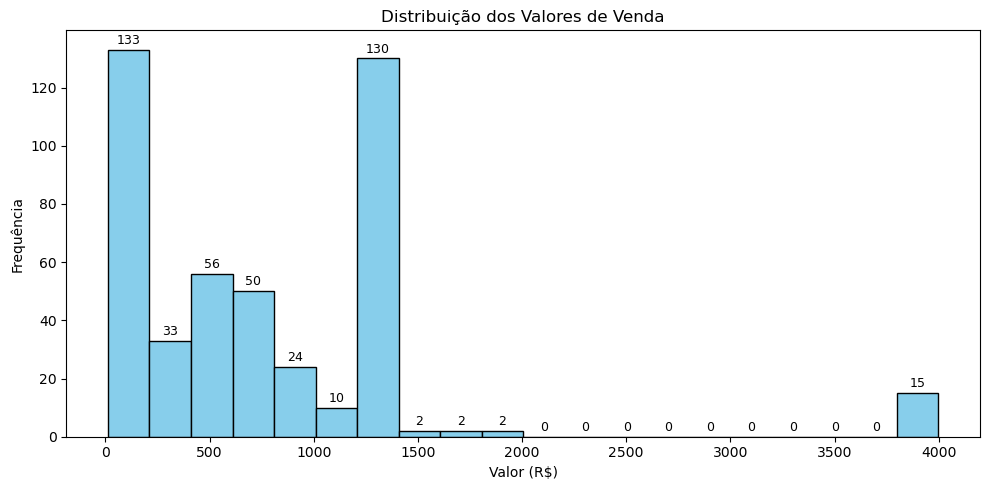

In [25]:
plt.figure(figsize=(10, 5))
n, bins, patches = plt.hist(df_vendas['valor_venda'], bins=20, color='skyblue', edgecolor='black')

plt.title('Distribuição dos Valores de Venda')
plt.xlabel('Valor (R$)')
plt.ylabel('Frequência')

# Adicionando rótulos nas barras
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width()/2,
             n[i] + 2,  # posição acima da barra
             int(n[i]),
             ha='center', fontsize=9)

plt.tight_layout()
plt.show()

##### Plot um Gráfico de barras por marca de produto


In [25]:
df_marca = df_vendas.groupby('marca_produto')['valor_venda'].sum().sort_values(ascending=False)
print(df_marca)


marca_produto
Brastemp      99208.30
Samsung       76490.00
Consul        60686.79
Motorola      35670.00
HP            27633.55
Panasonic     13573.00
Dell          12823.54
Britânia      10373.45
Epson          7872.46
Arno           6745.00
Electrolux     6690.02
Philco         1937.00
Sony            699.00
LG              679.00
Name: valor_venda, dtype: float64


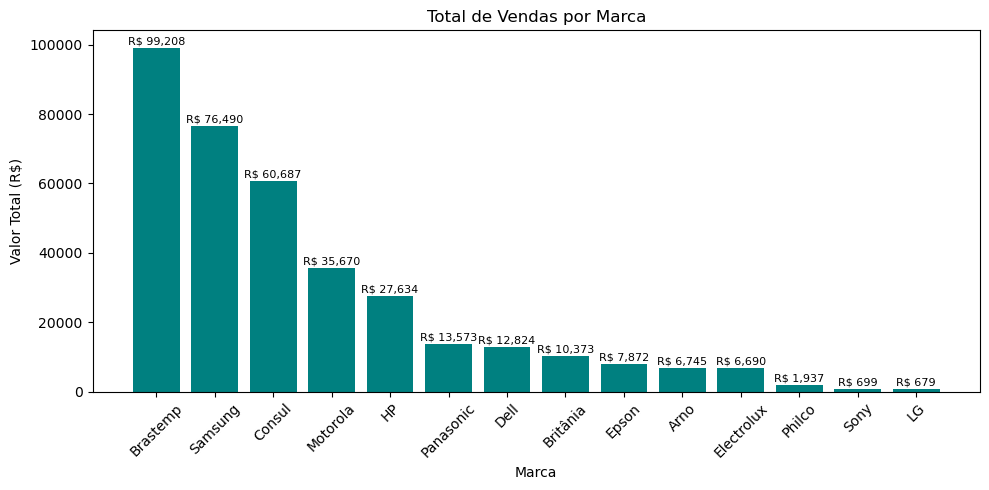

In [26]:
fig, ax = plt.subplots(figsize=(10, 5))
barras = ax.bar(df_marca.index, df_marca.values, color='teal')
ax.set_title('Total de Vendas por Marca')
ax.set_xlabel('Marca')
ax.set_ylabel('Valor Total (R$)')
plt.xticks(rotation=45)

# Rótulos
for barra in barras:
    altura = barra.get_height()
    ax.text(barra.get_x() + barra.get_width()/2, altura + 1000,
            f"R$ {altura:,.0f}", ha='center', fontsize=8)

plt.tight_layout()
plt.show()

##### Plot um Boxplot por categoria (para visualizar dispersão dos valores.

C:\Users\VASTRO\AppData\Local\Temp\ipykernel_4136\1817119360.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_vendas, x='categoria_produto', y='valor_venda', palette='Set2')


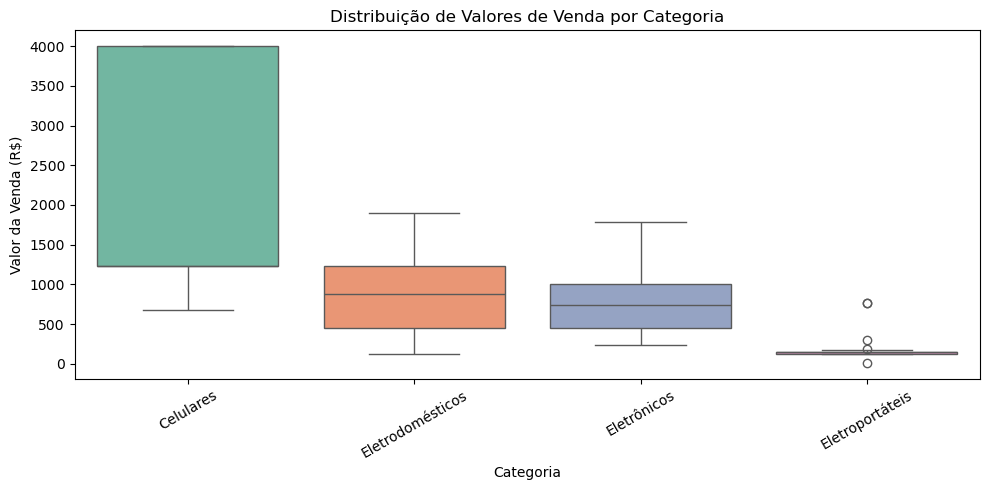

In [7]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_vendas, x='categoria_produto', y='valor_venda', palette='Set2')
plt.title('Distribuição de Valores de Venda por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Valor da Venda (R$)')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

### Etapa 6: Questões **DESAFIO**
🚨 **Desafio 1:** Renomeie a coluna `valor` para `percentual_aumento` e una os dois DataFrames.

In [13]:
df_categorias.rename(columns={'Valor': 'percentual_aumento'}, inplace=True)

df_merge = df_vendas.merge(df_categorias, left_on="categoria_produto", right_on="Categoria", how="left")
df_merge.head()

,cod_produto,nome_produto,categoria_produto,segmento_produto,marca_produto,cod_vendedor,nome_vendedor,cod_loja,cidade_loja,estado_loja,data_venda,valor_venda,Categoria,percentual_aumento
0,SKU-0000001,LG K10 TV Power,Celulares,Corporativo,LG,1009,Ana Teixeira,SP8821,São Paulo,São Paulo,04/10/2012,679.00,Celulares,1.20
1,SKU-0000002,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp,1006,Josias Silva,SP8821,São Paulo,São Paulo,01/01/2012,832.00,Eletrodomésticos,1.15
2,SKU-0000003,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Brastemp,1006,Josias Silva,SP8821,São Paulo,São Paulo,02/02/2012,790.00,Eletrodomésticos,1.15
3,SKU-0000004,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Brastemp,1003,Mateus Gonçalves,SP8821,São Paulo,São Paulo,03/03/2012,765.32,Eletrodomésticos,1.15
4,SKU-0000005,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Electrolux,1004,Artur Moreira,SP8821,São Paulo,São Paulo,04/04/2012,459.89,Eletrodomésticos,1.15


🚨 **Desafio 2:** Crie uma nova coluna no resultado do ultimo dataframe criado chamada `venda_final` aplicando o percentual de aumento.

In [15]:
df_merge['venda_final'] = df_merge['valor_venda'] * (1 + df_merge['percentual_aumento'] / 100)
df_merge.head().round(2)

,cod_produto,nome_produto,categoria_produto,segmento_produto,marca_produto,cod_vendedor,nome_vendedor,cod_loja,cidade_loja,estado_loja,data_venda,valor_venda,Categoria,percentual_aumento,venda_final
0,SKU-0000001,LG K10 TV Power,Celulares,Corporativo,LG,1009,Ana Teixeira,SP8821,São Paulo,São Paulo,04/10/2012,679.00,Celulares,1.20,687.15
1,SKU-0000002,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp,1006,Josias Silva,SP8821,São Paulo,São Paulo,01/01/2012,832.00,Eletrodomésticos,1.15,841.57
2,SKU-0000003,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Brastemp,1006,Josias Silva,SP8821,São Paulo,São Paulo,02/02/2012,790.00,Eletrodomésticos,1.15,799.08
3,SKU-0000004,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Brastemp,1003,Mateus Gonçalves,SP8821,São Paulo,São Paulo,03/03/2012,765.32,Eletrodomésticos,1.15,774.12
4,SKU-0000005,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Electrolux,1004,Artur Moreira,SP8821,São Paulo,São Paulo,04/04/2012,459.89,Eletrodomésticos,1.15,465.18


🚨 **Desafio 3:** Faça uma visualização agrupado por `categoria` e gerado um gráfico comparando os valores originais e com aumento.

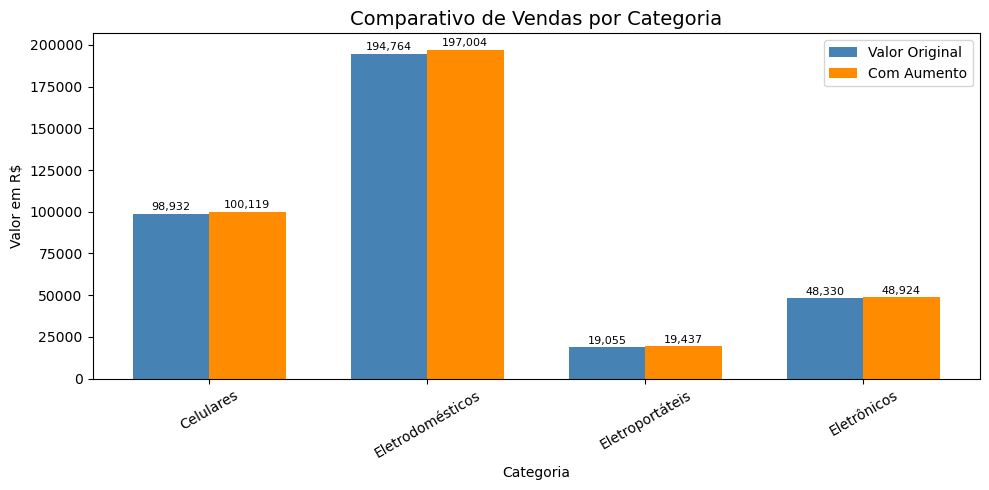

In [16]:
# Agrupando os dados
df_categoria = df_merge.groupby('categoria_produto')[['valor_venda', 'venda_final']].sum().reset_index()

# Parâmetros do gráfico
x = np.arange(len(df_categoria))
largura_barra = 0.35

fig, ax = plt.subplots(figsize=(10, 5))

# Barras lado a lado
barras1 = ax.bar(x - largura_barra/2, df_categoria['valor_venda'], width=largura_barra, label='Valor Original', color='steelblue')
barras2 = ax.bar(x + largura_barra/2, df_categoria['venda_final'], width=largura_barra, label='Com Aumento', color='darkorange')

# Títulos e eixos
ax.set_title('Comparativo de Vendas por Categoria', fontsize=14)
ax.set_xlabel('Categoria')
ax.set_ylabel('Valor em R$')
ax.set_xticks(x)
ax.set_xticklabels(df_categoria['categoria_produto'], rotation=30)
ax.legend()

# Adicionando rótulos nas barras
for barra in barras1:
    altura = barra.get_height()
    ax.text(barra.get_x() + barra.get_width()/2, altura + 2000, f'{altura:,.0f}', ha='center', fontsize=8, color='black')

for barra in barras2:
    altura = barra.get_height()
    ax.text(barra.get_x() + barra.get_width()/2, altura + 2000, f'{altura:,.0f}', ha='center', fontsize=8, color='black')

plt.tight_layout()
plt.show()

🚨 **Desafio 4:** Faça uma análise Calculando a comissão de 2,5% para cada vendedor.

In [17]:
# Agrupar por nome do vendedor e somar as vendas
df_vendedor = df_merge.groupby('nome_vendedor')['valor_venda'].sum().reset_index()
df_vendedor

,nome_vendedor,valor_venda
0,Aline Sutter,6051.99
1,Ana Teixeira,29221.12
2,André Pereira,87964.89
3,Artur Moreira,49944.79
4,Fernando Zambrini,21225.64
5,Josias Silva,50544.17
6,Maria Fernandes,55997.66
7,Mateus Gonçalves,36353.69
8,Rodrigo Fagundes,23777.16


In [19]:
# Agrupar por nome do vendedor e somar as vendas
df_vendedor = df_merge.groupby('nome_vendedor')[['valor_venda']].sum().reset_index()

# Calcular comissão de 2,5%
df_vendedor['comissao'] = (df_vendedor['valor_venda'] * 0.025).round(2)

# Exibir resultado
df_vendedor

,nome_vendedor,valor_venda,comissao
0,Aline Sutter,6051.99,151.30
1,Ana Teixeira,29221.12,730.53
2,André Pereira,87964.89,2199.12
3,Artur Moreira,49944.79,1248.62
4,Fernando Zambrini,21225.64,530.64
5,Josias Silva,50544.17,1263.60
6,Maria Fernandes,55997.66,1399.94
7,Mateus Gonçalves,36353.69,908.84
8,Rodrigo Fagundes,23777.16,594.43


🚨 **Desafio 5** Gere um gráfico com a comissão dos vendedores, calculados no desafio anterior.

C:\Users\VASTRO\AppData\Local\Temp\ipykernel_4136\1146861191.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('YlOrRd')  # ou 'viridis', 'coolwarm', etc.
C:\Users\VASTRO\AppData\Local\Temp\ipykernel_4136\1146861191.py:30: UserWarning: Glyph 128188 (\N{BRIEFCASE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\VASTRO\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128188 (\N{BRIEFCASE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


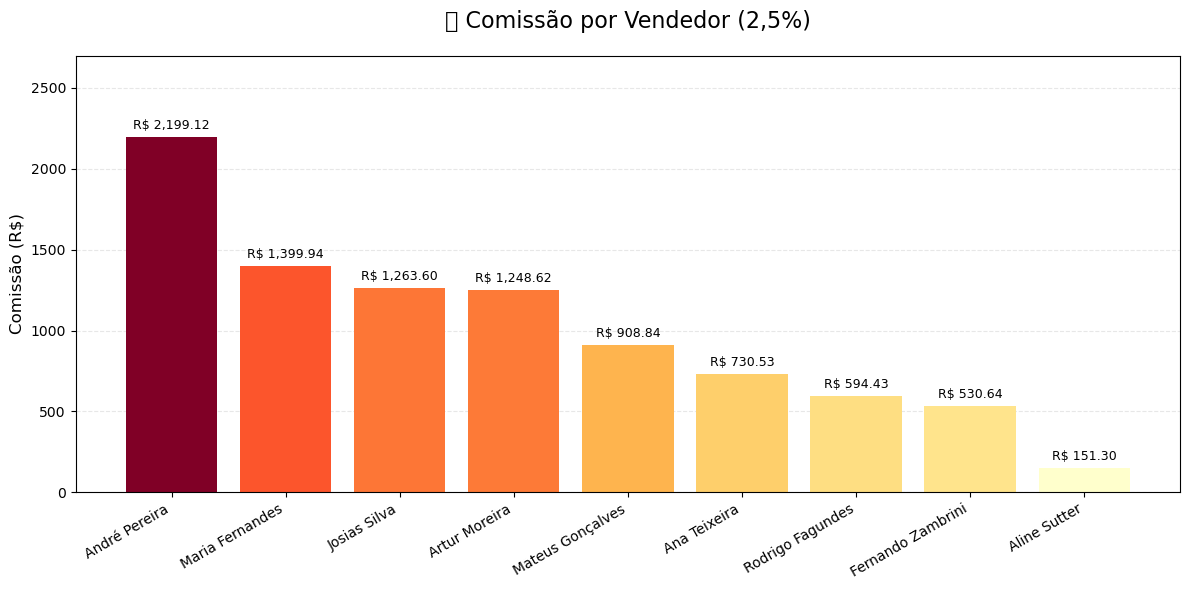

In [20]:
# Ordena os dados
df_vendedor_ordenado = df_vendedor.sort_values(by='comissao', ascending=False)

# Cria um mapa de cores com base na comissão
norm = plt.Normalize(df_vendedor_ordenado['comissao'].min(), df_vendedor_ordenado['comissao'].max())
cmap = plt.cm.get_cmap('YlOrRd')  # ou 'viridis', 'coolwarm', etc.
colors = cmap(norm(df_vendedor_ordenado['comissao'].values))

# Gráfico
fig, ax = plt.subplots(figsize=(12, 6))
barras = ax.bar(df_vendedor_ordenado['nome_vendedor'], df_vendedor_ordenado['comissao'], color=colors)

# Títulos e eixos
ax.set_title('💼 Comissão por Vendedor (2,5%)', fontsize=16, pad=20)
ax.set_ylabel('Comissão (R$)', fontsize=12)
ax.set_xlabel('')
ax.set_ylim(0, df_vendedor_ordenado['comissao'].max() + 500)
plt.xticks(rotation=30, ha='right', fontsize=10)

# Rótulos nas barras
for barra in barras:
    altura = barra.get_height()
    ax.text(barra.get_x() + barra.get_width()/2, altura + 50,
            f"R$ {altura:,.2f}", ha='center', fontsize=9, color='black')

# Grid leve
ax.yaxis.grid(True, linestyle='--', alpha=0.3)
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()


🚨 **Desafio 6:** Transforme a coluna `data_venda` em formato de data e crie uma nova coluna `ano` com o ano da venda.

In [21]:
df_merge['data_venda'] = pd.to_datetime(df_merge['data_venda'], format='%d/%m/%Y')
df_merge['ano'] = df_merge['data_venda'].dt.year
df_merge[['data_venda', 'ano']].head()

,data_venda,ano
0,2012-10-04,2012
1,2012-01-01,2012
2,2012-02-02,2012
3,2012-03-03,2012
4,2012-04-04,2012


🚨 **Desafio 7:** Calcule o total de vendas por ano.

In [22]:
df_merge.groupby('ano')['valor_venda'].sum().reset_index()

,ano,valor_venda
0,2012,37503.74
1,2013,93418.56
2,2014,63322.02
3,2015,166836.79


🚨 **Desafio 8:** Crie um gráfico de pizza com a distribuição percentual de vendas por categorias.

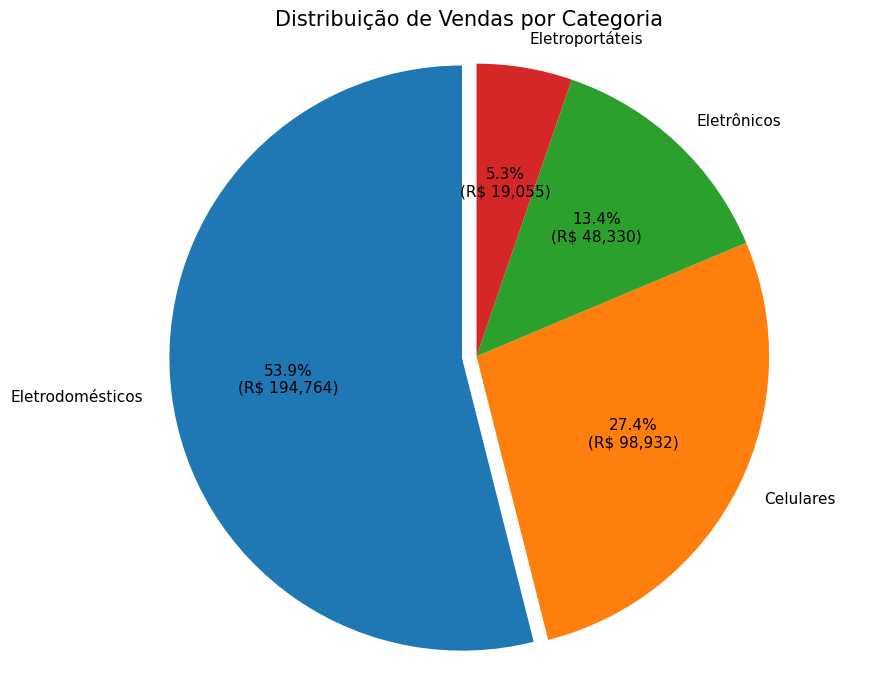

In [23]:
# Agrupar os dados de vendas por categoria
df_categoria_pizza = df_merge.groupby('categoria_produto')['valor_venda'].sum().sort_values(ascending=False)

# Cores e explosão na maior fatia
cores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
explode = [0.05 if i == 0 else 0 for i in range(len(df_categoria_pizza))]

# Plot do gráfico de pizza
plt.figure(figsize=(9, 7))
plt.pie(
    df_categoria_pizza,
    labels=df_categoria_pizza.index,
    explode=explode,
    autopct=lambda p: f'{p:.1f}%\n(R$ {p * df_categoria_pizza.sum() / 100:,.0f})',
    startangle=90,
    colors=cores,
    textprops={'fontsize': 11}
)

plt.title('Distribuição de Vendas por Categoria', fontsize=15)
plt.axis('equal')
plt.tight_layout()
plt.show()


🚨 **Desafio 9:** Escreva abaixo ao menos 2 insights baseados nas análises anteriores.

---Exemplo:
- Qual categoria mais fatura?
- Qual vendedor teve a maior comissão?
- Houve crescimento ano a ano?

In [ ]:
# Escreva seus insights aqui:
# 1.
# 2.

🚨 **Desafio 10:** Exporte os dados finais de categoria e comissão para arquivos CSV.

In [24]:
df_categoria.to_csv('relatorio_categoria.csv', index=False)
df_vendedor.to_csv('relatorio_vendedores.csv', index=False)

---

### 🛒 Desafio Extra — Projeto de Vendas com PostgreSQL usando psycopg2 e ipython-sql.

Agora que você finalizou a análise dos dados de vendas, chegou o momento de estruturar tudo como um banco de dados relacional real!

Neste desafio, você irá:

✅ Conectar ao PostgreSQL  
✅ Criar as tabelas via SQL  
✅ Inserir os dados linha a linha a partir do DataFrame (o dataframe gerado da Venda o qual calculamos a venda com aumento) .
✅ Realizar algumas consultas de negócio com SQL puro  

---

#### 🎯 Objetivo

Transformar os dados do seu projeto de vendas em um banco PostgreSQL, criando uma tabela chamada `vendas_final`, contendo as informações abaixo:

##### 🧱 Estrutura esperada da tabela `vendas_final`

| Campo           | Tipo     | Descrição                            |
|-----------------|----------|--------------------------------------|
| cod_produto     | texto    | Código identificador do produto      |
| nome_produto    | texto    | Nome do produto                      |
| categoria       | texto    | Categoria do produto                 |
| valor_venda     | numérico | Valor original da venda              |
| venda_final     | numérico | Valor com aumento aplicado           |
| nome_vendedor   | texto    | Nome do vendedor responsável         |
| data_venda      | data     | Data em que ocorreu a venda          |

---

#### 🔌 Etapa 1 — Conectando ao banco PostgreSQL (Dica)

```python
import psycopg2

try:
    conn = psycopg2.connect(
        host="localhost",
        database="aula01",
        user="postgres",
        password="1234"
    )
    print("Conexão bem sucedida!")
except Exception as e:
    print("Erro ao conectar ao banco de dados:", e)

# Criar o cursor
crsr = conn.cursor()

```
#### 🔑 Etapa 2 — Crie as tabelas com SQL com Python;
#### 🔎 Etapa 3 - Inserir os dados na tabela apartir do dataframe.
#### 📥 Etapa 4 - Realizar algumas consultas de negócio com SQL puro.

- Qual foi o total de vendas por categoria?
- Quem foram os 3 vendedores que mais venderam?
- Qual a média de valor final de venda?


#### 📦 Entregáveis do Desafio:

✅ Notebook .ipynb com:

- Conexão via psycopg2;
- Criação da tabela vendas_final;
- Inserção linha a linha dos dados;
- Banco PostgreSQL populado com os dados corretos;
- Execução de 3 consultas SQL obrigatórias;

✅ Entrega do Projeto:

- Subir o projeto no GITHUB, documentado e me enviar o link do repositório por email.
- Ou enviar o projeto por e-mail: nayara.valevskii@gmail.com

#### DICA:

Aproveite o projeto para o portfólio, documente e post no Linkedin.

Boa sorte, galerinhaaa! 🔥

